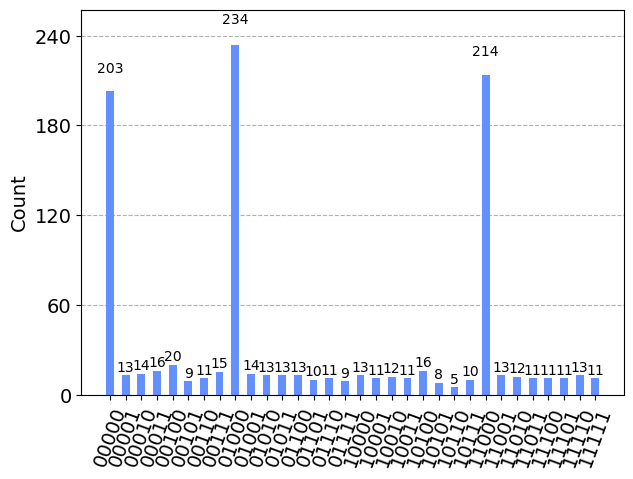

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n_bits = 5
query_register = list(range(n_bits))
aux = n_bits
circ = QuantumCircuit(n_bits + 1, n_bits)

# Hadamard Transform
def hadamard_transform(circ, my_wires):
    for wire in my_wires:
        circ.h(wire)

# Oracle
def oracle(circ, combos):
    for combo in combos:
        for i, bit in enumerate(combo):
            if bit == 0:
                circ.x(query_register[i])
    
        circ.mcx(query_register, aux)

        for i, bit in enumerate(combo):
            if bit == 0:
                circ.x(query_register[i])

# Diffusion Operator
def diffusion(circ):
    hadamard_transform(circ, query_register)
    
    circ.x(query_register)
    circ.h(query_register[-1])
    circ.mcx(query_register[:-1], query_register[-1])
    circ.h(query_register[-1])
    circ.x(query_register)
    
    hadamard_transform(circ, query_register)

# Setting up Grover's circuit
circ.x(aux)
hadamard_transform(circ, list(range(n_bits + 1)))

combo = [[0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1]]
oracle(circ, combo)
diffusion(circ)

circ.measure(query_register, query_register)

# Execute and visualize
backend = Aer.get_backend('qasm_simulator')
result = execute(circ, backend, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)
